In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


**Unsupervised ML to learn about data!**

In [2]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


In [3]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)


In [5]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(2000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
__________

In [0]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


In [0]:
autoencoder.compile(optimizer='adam', loss='mse')

In [0]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


In [10]:
train_history = autoencoder.fit(train_x, train_x, epochs=500, batch_size=2048, validation_data=(val_x, val_x), callbacks=[estop])


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 5s 80us/step - loss: 0.0916 - val_loss: 0.0688
Epoch 2/500
60000/60000 [==============================] - 1s 23us/step - loss: 0.0585 - val_loss: 0.0463
Epoch 3/500
60000/60000 [==============================] - 1s 23us/step - loss: 0.0419 - val_loss: 0.0386
Epoch 4/500
60000/60000 [==============================] - 1s 23us/step - loss: 0.0369 - val_loss: 0.0348
Epoch 5/500
60000/60000 [==============================] - 1s 23us/step - loss: 0.0331 - val_loss: 0.0306
Epoch 6/500
60000/60000 [==============================] - 1s 23us/step - loss: 0.0295 - val_loss: 0.0289
Epoch 7/500
60000/60000 [==============================] - 1s 23us/step - loss: 0.0265 - val_loss: 0.0251
Epoch 8/500
60000/60000 [==============================] - 1s 23us/step - loss: 0.0244 - val_loss: 0.0238
Epoch 9/500
60000/60000 [=============================

KeyboardInterrupt: ignored

In [0]:
pred = autoencoder.predict(val_x)

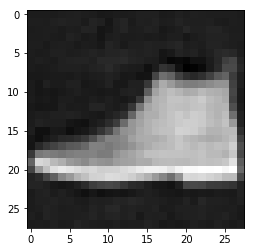

In [12]:
plt.imshow(pred[0].reshape(28, 28), cmap='gray')

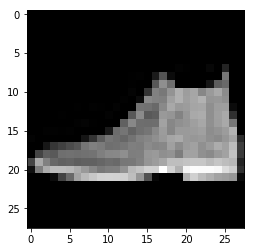

In [13]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')

In [0]:
from keras.datasets import fashion_mnist

In [16]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from keras import regularizers


from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

In [0]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)


In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(2000, activation='relu')(input_img)
encoded = Dense(500, activation='relu',
                activity_regularizer=regularizers.l1(10e-10))(encoded)
encoded = Dense(500, activation='relu',
                activity_regularizer=regularizers.l1(10e-10))(encoded)
encoded = Dense(10, activation='sigmoid',
                activity_regularizer=regularizers.l1(10e-10))(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [20]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_10 (Dense)             (None, 500)               1000500   
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
_________________________________________________________________
dense_13 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
__________

In [0]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
autoencoder.compile(optimizer='adam', loss='mse')

In [0]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [24]:
train_history = autoencoder.fit(train_x, train_x, epochs=200, batch_size=2048, validation_data=(val_x, val_x), callbacks=[estop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 36us/step - loss: 0.0913 - val_loss: 0.0678
Epoch 2/200
60000/60000 [==============================] - 1s 23us/step - loss: 0.0610 - val_loss: 0.0519
Epoch 3/200
60000/60000 [==============================] - 1s 23us/step - loss: 0.0471 - val_loss: 0.0407
Epoch 4/200
60000/60000 [==============================] - 1s 23us/step - loss: 0.0385 - val_loss: 0.0366
Epoch 5/200
60000/60000 [==============================] - 1s 23us/step - loss: 0.0358 - val_loss: 0.0344
Epoch 6/200
60000/60000 [==============================] - 1s 23us/step - loss: 0.0326 - val_loss: 0.0307
Epoch 7/200
60000/60000 [==============================] - 1s 23us/step - loss: 0.0295 - val_loss: 0.0282
Epoch 8/200
60000/60000 [==============================] - 1s 23us/step - loss: 0.0265 - val_loss: 0.0255
Epoch 9/200
60000/60000 [==============================] - 1s 23us/step - loss: 0.0251 - val_loss: 0.0

In [0]:
pred = autoencoder.predict(val_x)

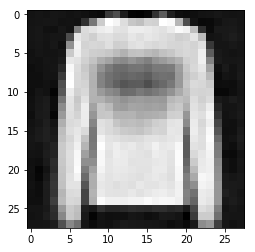

In [28]:
plt.imshow(pred[1].reshape(28, 28), cmap='gray')

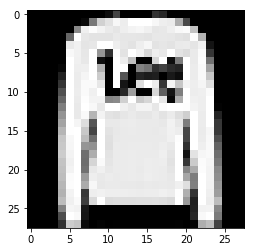

In [27]:
plt.imshow(val_x[1].reshape(28, 28), cmap='gray')

In [0]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

In [34]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input, Conv2D, MaxPool2D, UpSampling2D
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
from imgaug import augmenters as iaa
seq = iaa.Sequential([iaa.SaltAndPepper(0.2)])

train_x_aug = seq.augment_images(train_x)
val_x_aug = seq.augment_images(val_x)


In [0]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

train_x_aug = train_x_aug/255.
val_x_aug = val_x_aug/255.

train_x_aug = train_x_aug.reshape(-1, 28, 28, 1)
val_x_aug = val_x_aug.reshape(-1, 28, 28, 1)

In [0]:
# this is our input placeholder
input_img = Input(shape=(28, 28, 1))

# "encoded" is the encoded representation of the input
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPool2D((2, 2), padding='same')(encoded)
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPool2D((2, 2), padding='same')(encoded)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPool2D((2, 2), padding='same')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(64, (3, 3), activation='relu')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), padding='same')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [42]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [0]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
autoencoder.compile(optimizer='adam', loss='mse')

In [0]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


In [46]:
train_history = autoencoder.fit(train_x_aug, train_x, epochs=500, batch_size=2048, validation_data=(val_x_aug, val_x), callbacks=[estop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 10s 165us/step - loss: 0.0835 - val_loss: 0.0491
Epoch 2/500
60000/60000 [==============================] - 4s 71us/step - loss: 0.0402 - val_loss: 0.0339
Epoch 3/500
60000/60000 [==============================] - 4s 72us/step - loss: 0.0308 - val_loss: 0.0280
Epoch 4/500
60000/60000 [==============================] - 4s 71us/step - loss: 0.0265 - val_loss: 0.0250
Epoch 5/500
60000/60000 [==============================] - 4s 71us/step - loss: 0.0242 - val_loss: 0.0233
Epoch 6/500
60000/60000 [==============================] - 4s 71us/step - loss: 0.0228 - val_loss: 0.0223
Epoch 7/500
60000/60000 [==============================] - 4s 71us/step - loss: 0.0218 - val_loss: 0.0225
Epoch 8/500
60000/60000 [==============================] - 4s 71us/step - loss: 0.0212 - val_loss: 0.0209
Epoch 9/500
60000/60000 [==============================] - 4s 72us/step - loss: 0.0205 - val_loss: 0

KeyboardInterrupt: ignored

In [0]:
pred = autoencoder.predict(val_x)

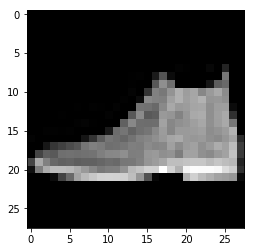

In [48]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')

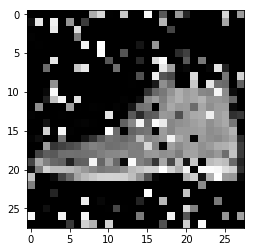

In [49]:
plt.imshow(val_x_aug[0].reshape(28, 28), cmap='gray')

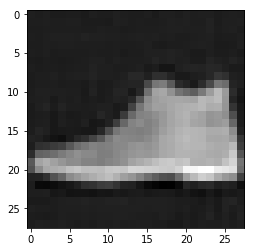

In [50]:
plt.imshow(pred[0].reshape(28, 28), cmap='gray')


In [0]:
from keras.datasets import fashion_mnist

In [52]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Input, Lambda, Layer, Add, Multiply
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

In [0]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)


In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(500, activation='relu')(input_img)

z_mu = Dense(10)(encoded)
z_log_sigma = Dense(10)(encoded)

class KLDivergenceLayer(Layer):

    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """

    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):

        mu, log_sigma = inputs

        kl_batch = - .5 * K.sum(1 + log_sigma -
                                K.square(mu) -
                                K.exp(log_sigma), axis=-1)

        self.add_loss(K.mean(kl_batch), inputs=inputs)

        return inputs

z_mu, z_log_sigma = KLDivergenceLayer()([z_mu, z_log_sigma])
z_sigma = Lambda(lambda t: K.exp(.5*t))(z_log_sigma)

eps = Input(tensor=K.random_normal(shape=(K.shape(input_img)[0],10)))
z_eps = Multiply()([z_sigma, eps])
z = Add()([z_mu, z_eps])

decoder = Sequential([
    Dense(500, input_dim=10, activation='relu'),
    Dense(784, activation='sigmoid')
])

decoded = decoder(z)

# this model maps an input to its reconstruction
autoencoder = Model([input_img, eps], decoded)


In [56]:
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 500)          392500      input_6[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 10)           5010        dense_17[0][0]                   
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 10)           5010        dense_17[0][0]                   
__________________________________________________________________________________________________
kl_diverge

In [0]:
def nll(y_true, y_pred):
    """ Negative log likelihood (Bernoulli). """

    # keras.losses.binary_crossentropy gives the mean
    # over the last axis. we require the sum
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)

In [0]:
autoencoder.compile(optimizer='adam', loss=nll)

In [0]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [60]:
train_history = autoencoder.fit(train_x, train_x, epochs=500, batch_size=2048, validation_data=(val_x, val_x), callbacks=[estop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 2s 30us/step - loss: 421.2372 - val_loss: 337.7020
Epoch 2/500
60000/60000 [==============================] - 1s 19us/step - loss: 315.6732 - val_loss: 300.6069
Epoch 3/500
60000/60000 [==============================] - 1s 19us/step - loss: 290.2850 - val_loss: 286.3036
Epoch 4/500
60000/60000 [==============================] - 1s 19us/step - loss: 277.9142 - val_loss: 274.5575
Epoch 5/500
60000/60000 [==============================] - 1s 19us/step - loss: 270.4135 - val_loss: 269.5258
Epoch 6/500
60000/60000 [==============================] - 1s 19us/step - loss: 266.5358 - val_loss: 267.4094
Epoch 7/500
60000/60000 [==============================] - 1s 19us/step - loss: 263.6435 - val_loss: 263.8795
Epoch 8/500
60000/60000 [==============================] - 1s 19us/step - loss: 261.2386 - val_loss: 263.1069
Epoch 9/500
60000/60000 [==============================] - 1s 19us/ste

In [0]:
pred = autoencoder.predict(val_x)

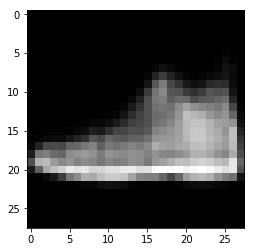

In [66]:
plt.imshow(pred[0].reshape(28, 28), cmap='gray')

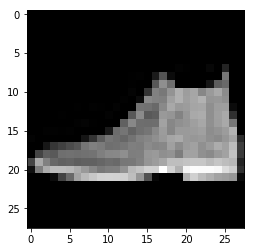

In [67]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')

dict_keys(['val_loss', 'loss'])


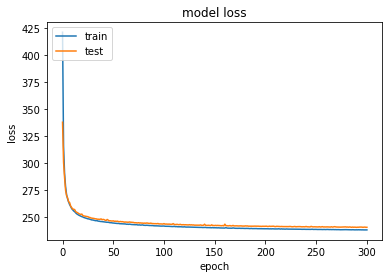

In [71]:
import matplotlib.pyplot as plt
print(train_history.history.keys())
# summarize history for accuracy
#plt.plot(train_history.history['acc'])
#plt.plot(train_history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16